In [211]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import tensorflow_probability as tfp
from tqdm import tqdm_notebook as tqdm
import copy

from mbptycho.code.simulation import reloadSimulation, Simulation
from skimage.registration import phase_cross_correlation
from scipy import io
from mbptycho.code.recons.recons import PhaseOnlyReconstruction

import os
base_path = os.environ['HOME']

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)


cmap = copy.copy(mpl.cm.get_cmap('coolwarm'))
cmap.set_bad('black')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
base_path = os.environ['HOME']

In [4]:
strain_type = 'point_inclusion'

In [5]:
probes_3d_h5_path = f'{base_path}/code/mbptycho/experiments/matlab/datasets_0821/probes.h5'
data_path =  f'{base_path}/code/mbptycho/experiments/python/{strain_type}_sparse/apodized_probe_weak_peaks'
sim_data_path = f'{data_path}/sim_{strain_type}.pkl'
sample_data_path = f'{data_path}/sample_{strain_type}.pkl'


In [186]:
# The "magnitudes_scaling_per_peak" parameter sets the scattering amplitude per peak.

sm = reloadSimulation(sim_data_path, reload_sim=False,
                      reload_sample_only_filename=sample_data_path,
                      save_sample_only_filename=sample_data_path,
                      new_sim_params={'probes_matlab_h5_file':probes_3d_h5_path, 
                                      'n_scan_positions':9,
                                      'npix_scan_shift':9,
                                      'HKL_list':np.array([[1, 0, 0],
                                                           [1, 1, 0],
                                                           [1, 2, 0],
                                                           [2, 1, 0]]),
                                     'magnitudes_scaling_per_peak': np.array([0.0007052, 0.0009, 
                                                                              0.0005033028, 0.0003033028]),
                                     'poisson_noise': True},
                      new_extra_sample_params={'strain_type':strain_type, 
                                               'npix_delta_x':5,
                                               'npix_delta_y':5})

Creating new simulation...
Reloading sample from provided file... /home/skandel/code/mbptycho/experiments/python/point_inclusion_sparse/apodized_probe_weak_peaks/sample_point_inclusion.pkl
Sample reloaded.
Magnitude scaling per peak is supplied. Does not apply random scaling.
Loading probe from h5py file...
Loading successfull...
Adding poisson noise...
Adding poisson noise...
Adding poisson noise...
Adding poisson noise...
Saving new simulation at /home/skandel/code/mbptycho/experiments/python/point_inclusion_sparse/apodized_probe_weak_peaks/sim_point_inclusion.pkl...


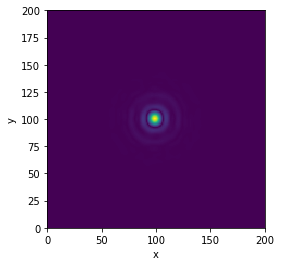

In [187]:
plt.pcolormesh(np.abs(sm.probes[0][...,50]))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')

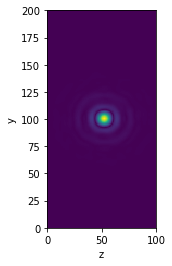

In [167]:
plt.pcolormesh(np.abs(sm.probes[0][:,100,:]))
plt.xlabel('z')
plt.ylabel('y')
plt.gca().set_aspect('equal')

In [168]:
sm.sample.z_full.shape

(100,)

/tmp/ipykernel_827047/1735190449.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sm.sample.y_full, sm.sample.z_full, np.abs(sm.probes[0][100,...]).T)


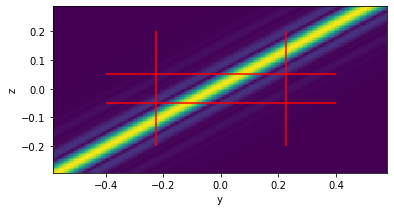

In [169]:
ly = sm.sample.params.grain_height / 2
lz = sm.sample.params.film_thickness / 2
plt.pcolormesh(sm.sample.y_full, sm.sample.z_full, np.abs(sm.probes[0][100,...]).T)
plt.vlines([-ly, ly], ymin=-0.2, ymax=0.2, color='red')
plt.hlines([-lz, lz], xmin=-0.4, xmax=0.4, color='red')
plt.xlabel('y')
plt.ylabel('z')
plt.gca().set_aspect('equal')

/tmp/ipykernel_827047/2377344103.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sm.sample.y_full, sm.sample.z_full, np.abs(probe[100,...]).T)


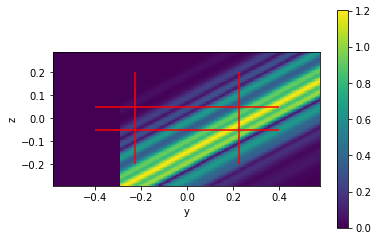

In [170]:
probe = np.pad(sm.probes[0], [[50, 0], [50, 0], [0,0]])[:200, :200]
ly = sm.sample.params.grain_height / 2
lz = sm.sample.params.film_thickness / 2
plt.pcolormesh(sm.sample.y_full, sm.sample.z_full, np.abs(probe[100,...]).T)
plt.vlines([-ly, ly], ymin=-0.2, ymax=0.2, color='red')
plt.hlines([-lz, lz], xmin=-0.4, xmax=0.4, color='red')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()
plt.gca().set_aspect('equal')

/tmp/ipykernel_827047/3477633911.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sm.sample.y_full, sm.sample.z_full, np.abs(field[100,...]).T)


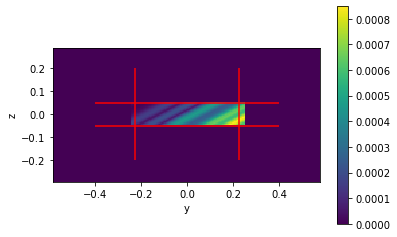

In [171]:
field = np.pad(sm.probes[0], [[50, 0], [50, 0], [0,0]])[:200, :200] * sm.rhos[0]
ly = sm.sample.params.grain_height / 2
lz = sm.sample.params.film_thickness / 2
plt.pcolormesh(sm.sample.y_full, sm.sample.z_full, np.abs(field[100,...]).T)
plt.vlines([-ly, ly], ymin=-0.2, ymax=0.2, color='red')
plt.hlines([-lz, lz], xmin=-0.4, xmax=0.4, color='red')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()
plt.gca().set_aspect('equal')

In [172]:
np.abs(sm.probes[0]).max()

727.2424894019255

In [173]:
(13* 13) // 2

84

In [174]:
(15 * 9) // 2

67

In [175]:
sm.sample.params

SampleParams(sample_pix_size=0.005844363636363636, wavelength=0.00013776, npix_xy=200, npix_depth=100, grain_width=0.5, grain_height=0.45, film_thickness=0.1, npix_delta_x=5, npix_delta_y=5, lattice=array([0.0003905, 0.0003905, 0.0003905]), strain_type='point_inclusion', random_scaled_magnitudes=True, magnitudes_max=1.0, grain_width_delta=0.5584436363636364, grain_height_delta=0.5084436363636364, npix_grain_width_only=86, npix_grain_height_only=77)

In [176]:
sm.params

SimulationParams(wavelength=0.00013776, det_pix_size=55, npix_det=150, HKL_list=array([[1, 2, 0]]), magnitudes_scaling_per_peak=array([0.0007052]), random_scaled_magnitudes=True, magnitudes_max=0.5, n_scan_positions=9, npix_scan_shift=9, sample_pix_size=0.005844363636363636, probes_matlab_h5_file='/home/skandel/code/mbptycho/experiments/matlab/datasets_0821/probes.h5', poisson_noise=False, poisson_noise_level=None, probe_abs_max=728)

/tmp/ipykernel_827047/1486082274.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(pys, pxs, dsums.reshape(q,q), norm=mpl.colors.LogNorm(), alpha=0.5)


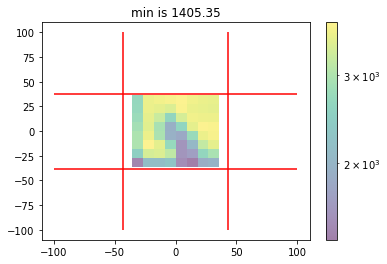

In [177]:
lx = sm.sample.params.npix_grain_width_only // 2
ly = sm.sample.params.npix_grain_height_only // 2
for s in sm.simulations_per_peak:
    
    pys = []
    pxs = []
    dsums = []
    
    for indx, (py, px) in enumerate(sm.ptycho_scan_positions):
        pys.append(py)
        pxs.append(px)
        dsums.append(s.diffraction_patterns[indx].sum())
    q = sm.params.n_scan_positions
    pys, pxs, dsums = [np.reshape(arr, (q, q)) for arr in [pys, pxs, dsums]]
    #pys = pys * sm.params.sample_pix_size
    #pxs = pxs * sm.params.sample_pix_size
    plt.pcolormesh(pys, pxs, dsums.reshape(q,q), norm=mpl.colors.LogNorm(), alpha=0.5)
    plt.colorbar()
    plt.title('min is %3.2f'%dsums.min())
    plt.vlines([-lx, lx], ymin=-100, ymax=100, color='red')
    plt.hlines([-ly, ly], xmin=-100, xmax=100, color='red')
    
    plt.show()

In [178]:
sm.sample.params

SampleParams(sample_pix_size=0.005844363636363636, wavelength=0.00013776, npix_xy=200, npix_depth=100, grain_width=0.5, grain_height=0.45, film_thickness=0.1, npix_delta_x=5, npix_delta_y=5, lattice=array([0.0003905, 0.0003905, 0.0003905]), strain_type='point_inclusion', random_scaled_magnitudes=True, magnitudes_max=1.0, grain_width_delta=0.5584436363636364, grain_height_delta=0.5084436363636364, npix_grain_width_only=86, npix_grain_height_only=77)

## Reconstructing the phases/ shared magnitudes

In [188]:
phases_init = []
magnitudes_init = []
for ii in range(1):
    r = sm.rhos[ii]
    r_this = r[...,50][sm.sample.obj_mask_w_delta[...,50]]
    phases_init.append(np.angle(r_this))
    magnitudes_init.append(np.abs(r_this))
phases_init = np.array(phases_init)
magnitudes_init = np.array(magnitudes_init)

In [206]:
recons = PhaseOnlyReconstruction(simulation=sm, shared_magnitudes=True,
                                 batch_size=50)#, phases_init=phases_init)
                                 #magnitudes_init=magnitudes_init)

Setting background_level to 1e-08...


In [207]:
phases_lr = 1e-2
magnitude_lr = 1e-2
if not 'phases_v' in recons.optimizers:
    recons.setPhaseAdamOptimizer(phases_lr)
else:
    recons.optimizers['phases_v']['learning_rate'].assign(phases_lr)

if not 'magnitudes_log_v' in recons.optimizers:
    recons.setMagnitudeLogAdamOptimizer(magnitude_lr)
else:
    recons.optimizers['magnitudes_log_v']['learning_rate'].assign(magnitude_lr)

#recons.optimizers

In [208]:
recons.minimize(1000, debug_output_epoch_frequency=10)

Initializing the datalog...
        epoch  train_loss   err_rho0   err_rho1   err_rho2   err_rho3  err_rho_film0  err_rho_film1  err_rho_film2  err_rho_film3
60         10    5.95e+04      0.894      0.947      0.936      0.943          0.868          0.937           0.92           0.93
120         20   6.72e+04       0.86      0.907      0.892      0.931      0.825      0.894       0.87      0.914
180         30   5.32e+04      0.821      0.866      0.855      0.928      0.776      0.849      0.835      0.903
240         40   3.86e+04      0.798      0.865      0.832      0.935      0.748      0.846      0.817      0.905
300         50   1.97e+04      0.772      0.868      0.778      0.931      0.723      0.855      0.765      0.904
360         60   2.42e+04       0.75      0.877      0.748      0.929      0.698      0.868      0.734      0.907
420         70   1.95e+04      0.692      0.879      0.728      0.922       0.65      0.875      0.712      0.911
480         80    2.5e+04   

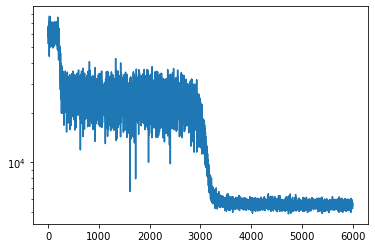

In [210]:
plt.plot(recons.datalog.dataframe.train_loss.dropna())
plt.yscale('log')

In [213]:

true_items = {}
recons_items = {}

if recons._model_type != 'phase':
    recons_items[r"$\alpha_x$"] = recons.ux_2d - recons.ux_2d.mean() 
    true_items[r"$\alpha_x$"] = recons._ux_true - recons._ux_true.mean() 

    recons_items[r"$\alpha_y$"] = recons.uy_2d - recons.uy_2d.mean()
    true_items[r"$\alpha_y$"] = recons._uy_true - recons._uy_true.mean()


if not recons._model_type == 'displacement_to_phase':

    for i in range(recons.rho_2d.shape[0]):
        phase_label = ''.join(sm.params.HKL_list[i].astype('str'))
        labelstr = rf"$\phi$({phase_label})"
        
        rollr, errr, phaser = phase_cross_correlation( recons._rho_true[i], recons.rho_2d[i])
        recons_items[labelstr] = np.angle(recons.rho_2d[i] * np.exp(1j * phaser))
        true_items[labelstr] = np.angle(recons._rho_true[i])

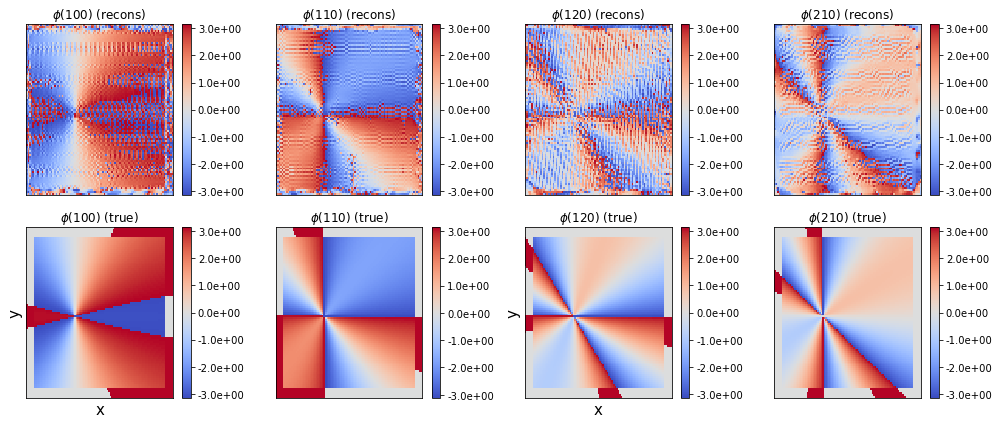

In [214]:
save_plots = False
if recons._model_type == 'phase':
    subplots_x = recons.rho_2d.shape[0] 
    figsize_x = subplots_x * 3.5
elif recons._model_type == 'displacement_to_phase':
    figsize_x = 8
    subplots_x = 2
else:
    subplots_x = (recons.rho_2d.shape[0] + 2) 
    figsize_x = subplots_x * 3.5

recons_suffix = recons._model_type

    
fig, axs = plt.subplots(2, subplots_x, figsize=[figsize_x, 6]) 
for i, (key, value) in enumerate(recons_items.items()):
    if i == 0 and recons._model_type != 'phase':
        vmin=-2.1
        vmax = 2.1
    elif i == 1 and recons._model_type!= 'phase':
        vmin = -0.21
        vmax = 0.21
    else:
        vmin = -np.pi
        vmax = np.pi
    
    #value[~(sm.sample.amplitudes_trunc_mask[pady0: pady0 + nyvar, padx0: padx0 + nxvar, nzvar//2])] = np.nan
    cp0 = axs[0, i].pcolormesh(value, cmap='coolwarm')#, vmin=vmin, vmax=vmax)
    axs[0, i].set_title(key + " (recons)")
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    plt.colorbar(cp0, ax=axs[0, i], format="%2.1e")
    
    true_value = true_items[key] 
    #true_value[~(sm.sample.amplitudes_trunc_mask[pady0: pady0 + nyvar, padx0: padx0 + nxvar, nzvar//2])] = np.nan
    cp1 = axs[1, i].pcolormesh(true_items[key], cmap='coolwarm')#, vmin=vmin, vmax=vmax)
    axs[1, i].set_title(key + " (true)")
    plt.colorbar(cp1, ax=axs[1, i], format="%2.1e")
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    
axs[1,0].set_xlabel('x', fontsize=15)
axs[1,0].set_ylabel('y', fontsize=15)

if not recons._model_type=='displacement_to_phase':
    axs[1,2].set_xlabel('x', fontsize=15)
    axs[1,2].set_ylabel('y', fontsize=15)


plt.tight_layout()

if save_plots:
    
    plt.savefig(f'{data_path}_recons_{recons_suffix}.png', bbox_inches='tight')
plt.show()

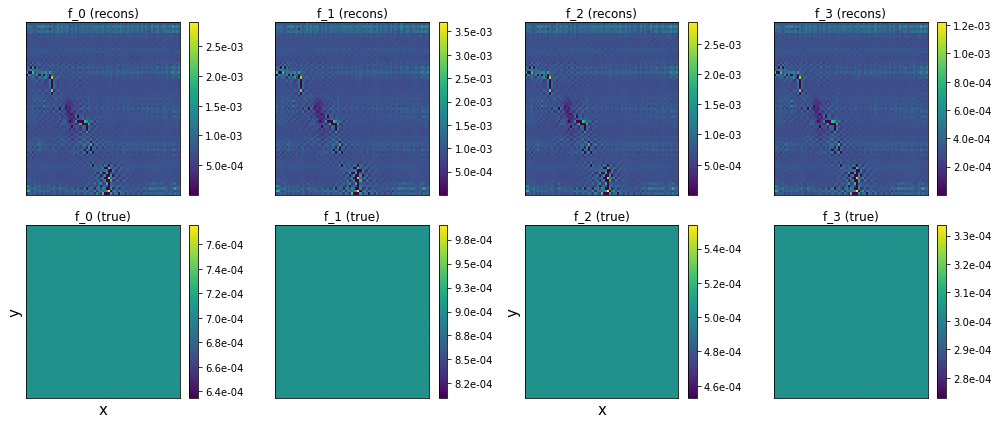

In [215]:
subplots_x = recons.rho_2d.shape[0] 
figsize_x = subplots_x * 3.5

fig, axs = plt.subplots(2, subplots_x, figsize=[figsize_x, 6]) 

for i in range(recons.rho_2d.shape[0]):
    recons_amplitudes = np.abs(recons.rho_2d[i][10:-10,10:-10])
    true_amplitudes = np.abs(recons._rho_true[i][10:-10,10:-10])
    
    cp0 = axs[0, i].pcolormesh(recons_amplitudes)
    axs[0, i].set_title(f"f_{i} (recons)")
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    plt.colorbar(cp0, ax=axs[0, i], format="%.1e")
    
    cp1 = axs[1, i].pcolormesh(true_amplitudes)
    axs[1, i].set_title(f"f_{i} (true)")
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    plt.colorbar(cp1, ax=axs[1, i], format="%.1e")
    
axs[1,0].set_xlabel('x', fontsize=15)
axs[1,0].set_ylabel('y', fontsize=15)

axs[1,2].set_xlabel('x', fontsize=15)
axs[1,2].set_ylabel('y', fontsize=15)


plt.tight_layout()
if save_plots:
    plt.savefig(f'{data_path}_recons_amplitudes.png', bbox_inches='tight')
plt.show()


In [61]:
recons.saveOutputsAndLog(data_path, prefix='')

rhos saved in /home/skandel/code/mbptycho/experiments/python/point_inclusion_sparse/weak_peaks//rho_phase_shared_mags.npz
dataframe saved in /home/skandel/code/mbptycho/experiments/python/point_inclusion_sparse/weak_peaks//df_phase_shared_mags.gz


In [62]:
phases_init = np.angle(recons.rho_2d)
magnitudes_init = np.abs(recons.rho_2d)

## Convert phases to displacements

In [63]:
from mbptycho.code.recons.recons import DisplacementFromPhaseReconstruction

In [64]:
recons2 = DisplacementFromPhaseReconstruction(simulation=sm, phases_init=phases_init)

In [65]:
recons2.minimize()

       epoch     err_ux     err_uy  err_ux_film  err_uy_film
1          1      0.489      0.428       0.0992       0.0809


In [66]:

true_items = {}
recons2_items = {}

if recons2._model_type != 'phase':
    recons2_items[r"$\alpha_x$"] = recons2.ux_2d - recons2.ux_2d.mean() 
    true_items[r"$\alpha_x$"] = recons2._ux_true - recons2._ux_true.mean() 

    recons2_items[r"$\alpha_y$"] = recons2.uy_2d - recons2.uy_2d.mean()
    true_items[r"$\alpha_y$"] = recons2._uy_true - recons2._uy_true.mean()


if not recons2._model_type == 'displacement_to_phase':

    for i in range(recons2.rho_2d.shape[0]):
        phase_label = ''.join(sm.params.HKL_list[i].astype('str'))
        labelstr = rf"$\phi$({phase_label})"
        
        rollr, errr, phaser = register_translation( recons2._rho_true[i], recons2.rho_2d[i], upsample_factor=10)
        recons2_items[labelstr] = np.angle(recons2.rho_2d[i] * np.exp(1j * phaser))
        true_items[labelstr] = np.angle(recons2._rho_true[i])

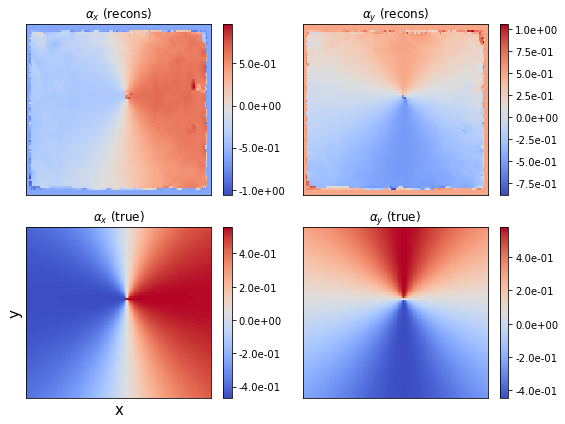

In [67]:
save_plots = False
if recons2._model_type == 'phase':
    subplots_x = recons2.rho_2d.shape[0] 
    figsize_x = subplots_x * 3.5
elif recons2._model_type == 'displacement_to_phase':
    figsize_x = 8
    subplots_x = 2
else:
    subplots_x = (recons2.rho_2d.shape[0] + 2) 
    figsize_x = subplots_x * 3.5

recons_suffix = recons2._model_type

    
fig, axs = plt.subplots(2, subplots_x, figsize=[figsize_x, 6]) 
for i, (key, value) in enumerate(recons2_items.items()):
    if i == 0 and recons2._model_type != 'phase':
        vmin=-2.1
        vmax = 2.1
    elif i == 1 and recons2._model_type!= 'phase':
        vmin = -0.21
        vmax = 0.21
    else:
        vmin = -np.pi
        vmax = np.pi
    
    #value[~(sm.sample.amplitudes_trunc_mask[pady0: pady0 + nyvar, padx0: padx0 + nxvar, nzvar//2])] = np.nan
    cp0 = axs[0, i].pcolormesh(value, cmap='coolwarm')#, vmin=vmin, vmax=vmax)
    axs[0, i].set_title(key + " (recons)")
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    plt.colorbar(cp0, ax=axs[0, i], format="%2.1e")
    
    true_value = true_items[key] 
    #true_value[~(sm.sample.amplitudes_trunc_mask[pady0: pady0 + nyvar, padx0: padx0 + nxvar, nzvar//2])] = np.nan
    cp1 = axs[1, i].pcolormesh(true_items[key], cmap='coolwarm')#, vmin=vmin, vmax=vmax)
    axs[1, i].set_title(key + " (true)")
    plt.colorbar(cp1, ax=axs[1, i], format="%2.1e")
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    
axs[1,0].set_xlabel('x', fontsize=15)
axs[1,0].set_ylabel('y', fontsize=15)

if not recons2._model_type=='displacement_to_phase':
    axs[1,2].set_xlabel('x', fontsize=15)
    axs[1,2].set_ylabel('y', fontsize=15)


plt.tight_layout()

if save_plots:
    
    plt.savefig(f'{data_path}_recons_{recons_suffix}.png', bbox_inches='tight')
plt.show()

In [111]:
recons.saveOutputsAndLog(data_path, prefix='')

In [68]:
ux = recons2_items[r'$\alpha_x$']
uy = recons2_items[r'$\alpha_y$']

In [69]:
dux = np.gradient(ux)#, sm.sample.params.sample_pix_size)
duy = np.gradient(uy)#, sm.sample.params.sample_pix_size)
du = np.stack([dux, duy], axis=0)

In [70]:
sm.sample.params.lattice

array([0.0003905, 0.0003905, 0.0003905])

In [71]:

import matplotlib.colors as colors

<ipython-input-72-0a9d9b3db263>:11: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  im = axs[i * 2 + j].pcolormesh(sl, cmap=cmap,   norm=colors.SymLogNorm(linthresh=0.001, linscale=0.001,


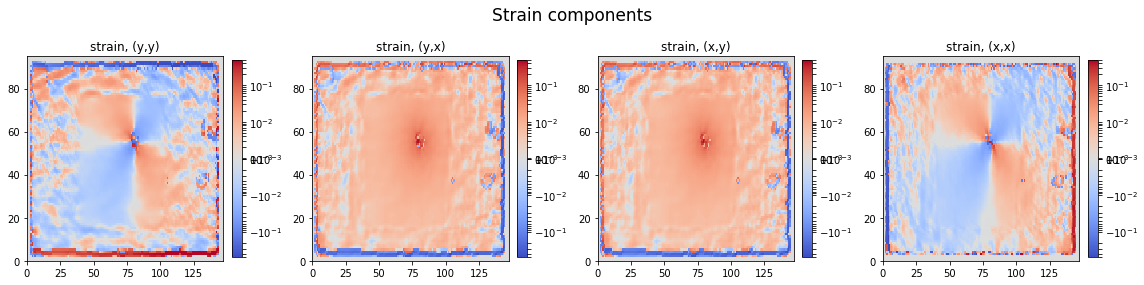

In [72]:
s = np.zeros(du.shape)
fig, axs = plt.subplots(1,4, figsize=(16,4))
coord_axes = {0:'y', 1:'x', 2:'z'}
for i in range(2):
    for j in range(2):
        s[i,j] = 0.5 * (du[j,i] + du[i,j]) #* sm.sample.params.lattice[0]
        # s[i,j][plots_3d_mask_trunc] = np.nan
        #s[i,j][~sm.sample.amplitudes_trunc_mask] = np.nan
        sl = s[i,j, :, :]
        sl = sl#[10:-10,10:-10]
        im = axs[i * 2 + j].pcolormesh(sl, cmap=cmap,   norm=colors.SymLogNorm(linthresh=0.001, linscale=0.001,
                                              vmin=-.5, vmax=0.5))
        axs[i * 2 + j].set_title(f'strain, ({coord_axes[i]},{coord_axes[j]})')
        plt.colorbar(im, ax=axs[2*i + j], fraction=0.046, pad=0.04)
plt.suptitle('Strain components', fontsize=17)
plt.tight_layout()

#if save_plots:
    #plt.savefig(f'{data_path}strain.pdf', bbox_inches='tight')
          
plt.show()  